## Before submitting
1. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2. Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.

4. Please submit only the `*.ipynb` file.

5. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". Edit only between `YOUR CODE HERE` and `END YOUR CODE`.

6. Make sure to use Python 3, not Python 2.

Fill your group name and collaborators below:

In [1]:
GROUPNAME = "GROUP 17"
COLLABORATORS = "Aleksandra Kudaeva, Tor Istvan Stadler Kjetså"

### Exercise 1.1: Dirichlet distribution (5 pts)

* Sample $N = 5000$ points from Dirichlet distribution for all given *alphas*, one by one, using **dirichlet** rvs function from _scipy.stats_ package (alredy imported). 


* Compute pdf values for the samples points with the given alphas one by one using **dirichlet** pdf function.


* Perform dimensionality reduction to have 2-dimensional data projections using **PCA** function from _sklearn.decomposition_ package (alredy imported).


* Depict your projected data as scatter-subplots using the corresponding pdf values as colors together with **cm.rainbow** colormap.


* Set for the scatter plot alpha transparency value equal to 20%.


Your plot should look like:

<img src='Dir.png' width=700>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from sklearn.decomposition import PCA
from scipy.stats import dirichlet, multinomial

%matplotlib inline

In [3]:
N = 5000
alphas = np.array([ [.1,.1,.1],
                    [.3,.3,.3],
                    [1,1,1],
                    [2,1,1],
                    [3,1,2],
                    [3,3,3]
                ])

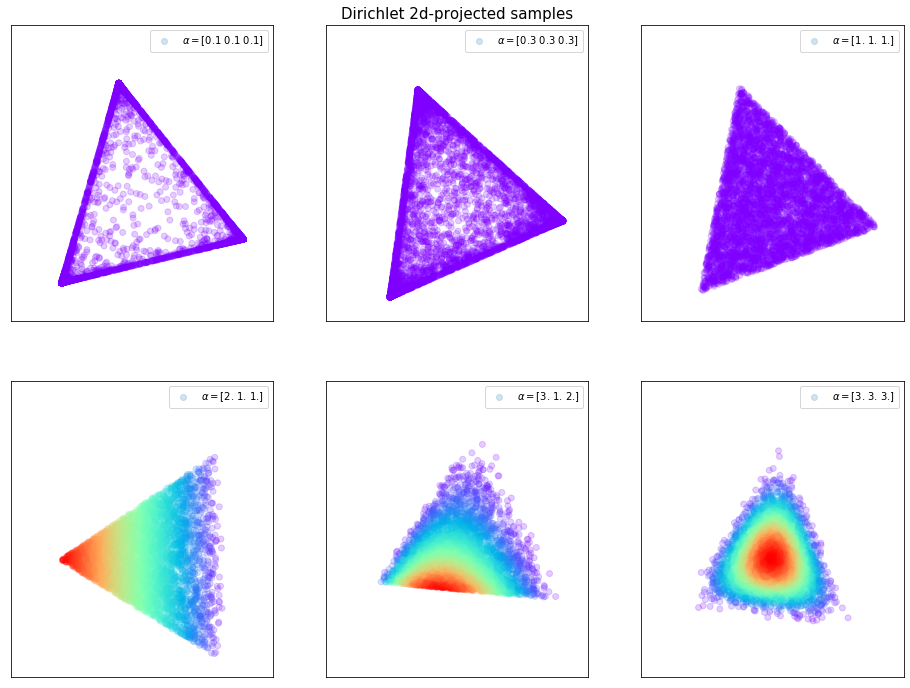

In [4]:
f,axis = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(16,12))
n = 0
for i in range(2):
    for j in range(3):
        ax = axis[i,j]
        alpha = alphas[n]
        
        # YOUR CODE HERE
        X_sample = dirichlet.rvs(alpha, size = N, random_state = 42)
        X_pdf = dirichlet.pdf(X_sample.T, alpha) 
        pca = PCA(n_components = 2)
        X_fit = pca.fit_transform(X_sample)
        
        
        ax.scatter(*X_fit.T,label="$\\alpha = $" + str(alpha), c = X_pdf, cmap = cm.rainbow, alpha = 0.2)
        
        ax.legend(loc=1)
        ax.set_ylim(-0.8,1.2)
        ax.set_xlim(-1,1)
        ax.set_xticks([])
        ax.set_yticks([])
        n+=1
_=axis[0,1].set_title("Dirichlet 2d-projected samples", fontsize=15)

#### Latex definition section (double click to see)

$\newcommand{\lrg}{\large }$
$\newcommand{\where}{\ \text{where}\ }$
$\newcommand{\and}{\ \text{and}\ }$
$\newcommand{\Dir}{\text{Dir} }$
$\newcommand{\C}{\mathcal{C} }$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\const}{\text{const} }$
$\newcommand{\sumK}{\sum_{k=1}^K }$
$\newcommand{\sumM}{\sum_{j=1}^M }$
$\newcommand{\sumV}{\sum_{v=1}^V }$
$\newcommand{\sumN}{\sum_{n=1}^N }$

### Exercise 1.2: Dircihlet distribution first moment (5 pts)

* Write the Dirihlet distribution in expential family form, where pdf of the Dirichlet is given by:


$$\lrg{ 
p(x | \alpha) = \frac{\Gamma(\sumK \alpha_k)}{\prod_{k=1}^K\Gamma(\alpha_k)}\prod_{k=1}^K x_k^{\alpha_k-1}, \where x_k \in (0,1)\ \text{for}\ k = \overline{1..K},  \and \sumK{x_k} = 1.
}$$
<br><br>

$$\lrg{ 
\text{ANSWER}\\
p(x | \eta) = \exp{\Big(\sumK \eta_k \ln{x_k} - \Big(\sumK \ln{\Gamma(\eta_k +1)} - \ln{\Gamma \Big(\sumK \eta_k + 1\Big)\Big)\Big)}}
}$$

* Using the exponential family property show that the first moment of the Dirichlet distribution is :


$$\lrg{\E[\ln\alpha_k] = \Psi(\alpha_k) - \Psi\Big(\sum_{k=1}^K \alpha_k \Big)\\
\text(typo: \E[\ln\alpha_k] -> \E[\ln{x_k}])
}$$



**Property:** $\lrg{
\E[u(x)] = -\triangledown_{\eta} \ln g(\eta)  = \triangledown_{\eta} A(\eta)
}$

**Note:** Digamma function $\lrg{ \Psi(x) =  \frac{d}{dx} \ln \Gamma(x) = \frac{\Gamma(x)^{'}}{\Gamma(x)}}$ 


$$\lrg{
\text{seperating iteration variable k and index variable j for readability}\\
(\frac{d}{d\alpha} = \frac{d}{d\eta}) \\
\E[u(x)] = \text{YOUR ANSWER HERE}\\
\text{ANSWER:}\\
\E[\ln{x_j}] = \triangledown_{\alpha_j} \Big(\sumK \ln{\Gamma(\alpha_k)} - \ln{\Gamma \Big(\sumK \alpha_k\Big)}\Big) \\
= \sumK \Psi(\alpha_k) \frac{d\alpha_k}{d\alpha_j} - \Psi(\sumK\alpha_k) \frac{d\sumK\alpha_k}{d\alpha_j}\\
= \Psi(\alpha_j) - \Psi\Big(\sum_{k=1}^K \alpha_k \Big)
}$$ 

### Exercise 1.3: Multinomial distribution (5 pts)


* Draw $M = 6$ samples $\theta_k \in \R^{K},\ k = \overline{1..K},\quad K = 3$ from Dirichlet distribution with alphas as three-dimensional vector of ones.


* Use $\text{random_state} = 42$ for all sampling procedures.


* Draw $M = 25$ multinomial samples $X$ for each of the five generated thetas.


* Compute the emirical mean over the multinomial samples for each theta and each dimension.


* Depict all of your generated thetas as well as the empirical means in one plot with subplots.


* Collect all ot the sampled data in $X_{all}$ tensor. $X_{all} \in \R^{(M,N,K)}$

Your plot should look like:

<img src='mult.png' width=1000>

<br><br>
**Note:** $\lrg{\E[x_k] = \theta_k, \where x \sim \Mult(x | \theta),\ x_k \in \{0, 1\},\ k=\overline{1..K},\ \sumK x_k =1,\ \sumK \theta_k = 1}$.

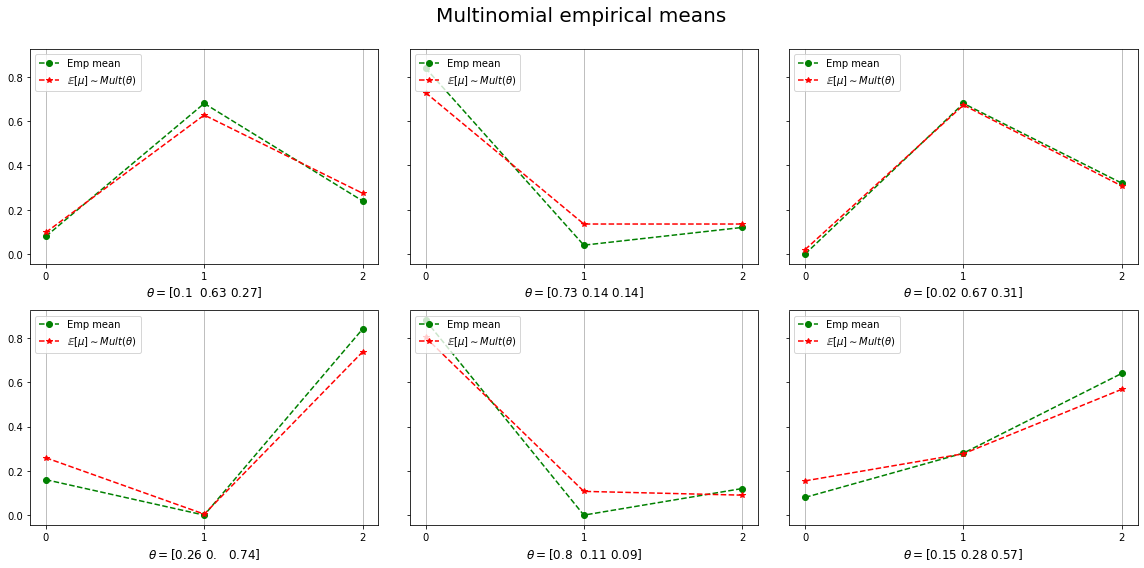

In [5]:
M = 6
K = 3
N = 25
alpha_0 = np.ones(K)

f,axis = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(16,8))
n = 0


thetas = dirichlet.rvs(alpha_0, M, random_state = 42)# YOUR CODE HERE <- Sample thetas


all_X  = []
for i in range(2):
    for j in range(3):
        ax = axis[i,j]
        space = np.arange(K)
        
        # YOUR CODE HERE <- Sample x
        x = multinomial.rvs(1, size = N, p = thetas[n], random_state = 42)
        all_X.append(x)
        

        ax.plot(space, x.mean(0), 'og--',label='Emp mean')
        ax.plot(space, thetas[n],'r*--', label='$\\mathbb{E}[\mu] \sim Mult(\\theta)$')
        ax.set_xticks(space)
        ax.grid(axis='x')
        ax.legend(loc=2)
        ax.set_xlabel('$\\theta = $'+f'{np.round(thetas[n],2)}', fontsize=12)
        n+=1
axis[0,1].set_title('Multinomial empirical means \n', fontsize=20)
plt.tight_layout()

all_X = np.array(all_X)
assert all_X.shape == (M,N,K)

### Exercise 1.4: Multinomial-Dirichlet conjugacy (5 pts).

* Evaluate the posterior of $\theta$ given the model distribution is multinomial with $\theta$ and prior is Dirichlet with $\alpha$. See the picture below.
<br>

<img src='mdir_conj.png' width=400>

Model distribution

$$\lrg{
p(x_n | \theta) \sim \Mult(x_n | \theta) ,\quad \ln p(x_n | \theta) = \sumK x_{nk} \ln \theta_{k} + \const
}$$

Prior distribution

$$\lrg{
p(\theta | \alpha) = \Dir(\theta | \alpha), \quad \ln p(\theta | \alpha) = \ln\C(\alpha) + \sumK (\alpha_k - 1) \ln\theta_{k}, \where \\ \quad \quad \quad \quad  \quad \quad  \quad  \ln\C(\alpha) = \ln\Gamma\Big(\sumK \alpha_k\Big) - \sumK \ln\Gamma\Big(\alpha_{k}\Big)
}$$

* Evaluate the posterior distribution

$$\lrg{
\ln p(\theta | X, \alpha) = \ln p(X | \theta) + \ln p(\theta | \alpha) + \const 
}$$
<br><br>
$$\lrg{
\ln p(\theta | X, \alpha) = \sumK\Big(\sumN x_{nk} + \alpha_k -1\Big)\ln{\theta_k} + \ln\C(\sumN x_{n} + \alpha) + const}$$
<br><br>
$$\boxed{\lrg{
p(\theta| X, \alpha) \sim \Dir(\theta | \hat\alpha),\where \hat\alpha = \sumN x_{n} + \alpha
}}$$

### Exercise 1.5: Dirichlet posterior (3 pts)

* Implement the posterior pdf as a function of input data X and hyperparameter $\alpha$.


* Your posterior function should return computed pdf value as well as the alpha_hat.


* You may use **dirichlet** function from _scipy.stats_ package for pdf computation.


In [6]:
def posterior(x, X, alpha):
    alpha_hat = np.sum(X, axis = 0) + alpha
    pdfs = dirichlet.pdf(x.T, alpha_hat)
    
    return pdfs, alpha_hat

### Exercise 1.6: Bayes estimation (7 pts)

* Compute the Bayes estimator (mean of the posterior) for all of the data generated by corresponding $\theta$. 


* Sample $N = 5000$  test data points from uniform-Dirichlet ($\alpha_0 = 1$) distribution.


* Compute posterior pdf values for all of the test points.


* Perform dimensionality reduction to 2-dim data with **PCA** function.


* Depict the projected test data with corresponding pdfs values as colors. Use **cm.rainbow** colormap.

Your plot should look like:

<img src='post.png' width=800>

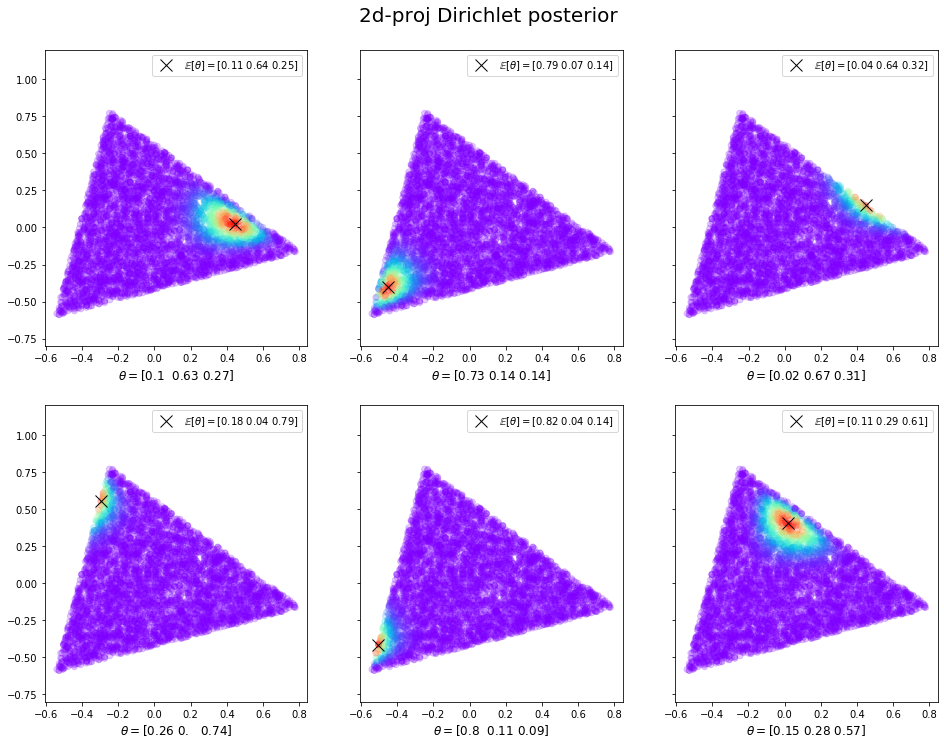

In [7]:
M,N,K = all_X.shape

N = 5000
alpha_0 = np.ones(K)

f,axis = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(16,12))

n = 0
for i in range(2):
    for j in range(3):
        ax = axis[i,j]
        X_tr = all_X[n]
        theta = thetas[n]
        
        pca = PCA(n_components=2)
        
        # YOUR CODE HERE    
        X_sample = dirichlet.rvs(alpha_0, size = N, random_state = 42)
        pdf, alpha_hat = posterior(x = X_sample, X = X_tr, alpha = alpha_0) 
        pca = PCA(n_components = 2)
        space_range = pca.fit_transform(X_sample)
        E_theta = np.round(alpha_hat / np.sum(alpha_hat),2)
    
        idx = np.argmax(pdf)
        ax.set_ylim(-0.8,1.2)
        ax.plot(*space_range[idx], 'kx', ms=12, label='$\\mathbb{E}[\\theta] = $'+f'{E_theta}')
        ax.scatter(*space_range.T, c=pdf, cmap=cm.rainbow, alpha=0.2)
        ax.set_xlabel('$\\theta = $'+f'{np.round(theta,2)}', fontsize=12)
        ax.legend(loc=1)
        n+=1
_=axis[0,1].set_title('2d-proj Dirichlet posterior \n', fontsize=20)    

### Exercise 1.7: Evidence function (5 pts)

* Evaluate the negative evidence function $-\mathcal{L}(\alpha) = -\ln p(X|\alpha)$ as a function of the hyperparameter $\alpha$ and data $X$.


$$\lrg{
p(X | \alpha) = \int p(X, \theta|\alpha)\ d\theta = \int p(X | \theta) p (\theta | \alpha)\ d\theta  
}$$
<br><br>
$$\lrg{
-\ln p(X | \alpha) = \ln\Gamma(\sumK \alpha_k) - \sumK\ln\Gamma(\alpha_k) + \sumK\ln\Gamma(\hat\alpha_k) - \ln\Gamma(\sumK\hat\alpha_k)
}$$

* Implement the negative **evidence** function

In [8]:
from scipy.special import loggamma
def neg_evidence(alpha,X):
    
    # YOUR CODE HERE
    alpha_hat = X.sum(axis = 0) + alpha
    neg_ev_log = - ( loggamma(alpha.sum()) - loggamma(alpha).sum() 
                    + loggamma(alpha_hat).sum() - loggamma(alpha_hat.sum()) )
    neg_ev = np.exp(neg_ev_log)
    
    
    return neg_ev 

### Exercise 1.8: Bayesian empirical learning (5 pts)

* Perform hyperparameter $\alpha$ minimization using the negative evidence function with _scipy.minimize_ function with the given boundaries.


* Collect and print the best (rounded to integer) alphas after minimization.

In [9]:
from scipy.optimize import minimize

bnds = np.array([[0.01,np.inf]]*K)

best_alphas = []
for x in all_X:
    
    # YOUR CODE HERE 
    best_alpha = np.ones(K)
    res = minimize(neg_evidence, best_alpha, args = x, bounds = bnds)
    best_alpha = res['x']
    best_alphas.append(best_alpha)
    
    # YOUR CODE HERE
print(np.round(best_alphas,0))


[[ 80. 679. 240.]
 [954.  46. 137.]
 [  0. 454. 188.]
 [ 76.   0. 400.]
 [586.   0.  80.]
 [ 40. 141. 324.]]


### Exercise 1.9: Bayesian empirical learning (5 pts)

* Repeat procedure from the Exercise 1.6 but now with using best alphas after hyper parameter optimization.


* Create the Dirichltet posterior plots similar to the Exercise 1.6


* Find the reason why your Bayes estimators are not accurate anymore as compared to them before the empirical optimization.

<img src='best_post.png' width=800>

ValueError: Each entry in 'x' must be greater than zero if its alpha is less than one.

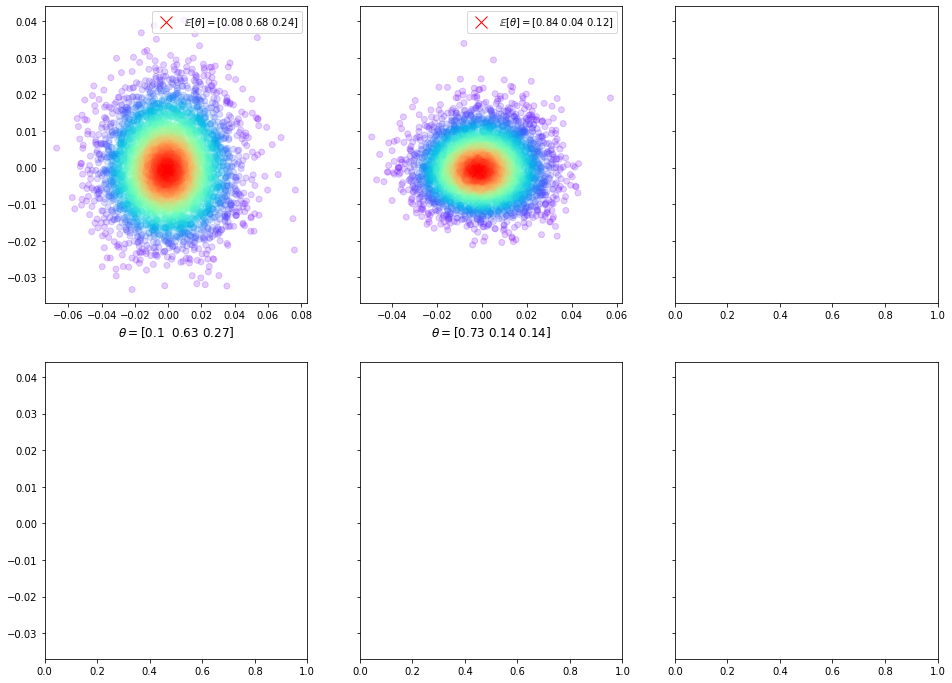

In [19]:
M,N,K = all_X.shape

N = 5000
#alpha_0 = np.ones(K)
#alpha_0 = best_alphas

f,axis = plt.subplots(2, 3, sharex=False, sharey=True, figsize=(16,12))
n = 0
for i in range(2):
    for j in range(3):
        ax = axis[i,j]
        X_tr = all_X[n]
        pca = PCA(n_components=2)
        
        
        # YOUR CODE HERE
        alpha_0 = best_alphas[n]
        X_sample = dirichlet.rvs(alpha_0, size = N, random_state = 42)
        pdf, alpha_hat = posterior(x = X_sample, X = X_tr, alpha = alpha_0) 
        pca = PCA(n_components = 2)
        space_range = pca.fit_transform(X_sample)
        E_theta = np.round(alpha_hat / np.sum(alpha_hat),2)

        idx = np.argmax(pdf)
        ax.plot(*space_range[idx], 'rx', ms=12, label='$\\mathbb{E}[\\theta] = $'+f'{E_theta}')
        ax.scatter(*space_range.T, c=pdf, cmap=cm.rainbow, alpha=0.2)
        ax.set_xlabel('$\\theta = $'+f'{np.round(thetas[n],2)}', fontsize=12)
        ax.legend(loc=1)
        n+=1
_=axis[0,1].set_title('2d-proj Dirichlet posterior \n', fontsize=20)   

<hr><hr>

### Latent Dirichlet Allocation (Topic model)


Original paper from Dadiv M. Blei could be found <a href='http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf'>here</a>.

* Graphical model for the LDA
<br>
<img src='LDA.png' width=500>

### Exercise 2.1: LDA paper and true beta loading (5 pts)

* Read the paper linked above


* Load the _true_ betas from the **true_beta.npy** file. Use _np.load_ function.


* Depict the loaded betas as seven 10x10 images using **imshow** function. 

Your image should look like:

<img src='betas.png' width=500>

In [ ]:
import matplotlib.pyplot as plt
true_BETA = np.load("true_beta.npy")

K,V = true_BETA.shape
f, axis = plt.subplots(1,K)
for k in range(K):
    ax = axis[k]
    ax.imshow(true_BETA[k].reshape(10,10))

### Exercise 2.2: Topic model toy data generation (10 pts)

* Implement function called **toy** which generates all of the LDA model parameters: $W$, $z_{true}$ and $\theta_{true}$ for the given (true) betas. Use $\alpha_0 = 0.1$ as a defult value.


* Input parameters: 
    
    *$M$-number of the generated document
    
    *$N$-number of the obseved words in each document
    
    
* Use **multinomial** function from _scipy.stats_ package with random seed 42.


**Note:** number of topics $K$ and vocabulary size $V$ can be retrieved from the true betas.

In [ ]:
alpha_0 = [0.1]
alpha = alpha_0 * 7
print(alpha)
theta = dirichlet.rvs(alpha, random_state = 42)[0]
print(theta.shape)
print(theta)
print(N)
print(multinomial.rvs(7, theta, random_state = 42))

In [ ]:
from scipy.stats import multinomial, dirichlet
alpha_0 = [0.1]
def toy(M, N, beta, alpha_0=.1):
    K,V = beta.shape
    Z = np.empty((M,N,K),dtype=np.int)
    W = np.empty((M,N,V),dtype=np.bool)    
    alpha = alpha_0 * 7
    # YOUR CODE HERE
    
    for m in range(M):
        theta = dirichlet.rvs(alpha, random_state = 42)[0]
        for i in range(N):
            z_n = multinomial.rvs(n = 1, p = theta[0])
            w_n = multinomial.rvs(n = 1, p = beta[z_n][0]).astype(bool)
            Z[m,n] = z_n
            W[m,n] = w_n
        
    
    return W,Z,theta

* Generate all of the LDA model toy data parameters $W$, $z_{true}$ and $\theta_{true}$ with your function with 128 words in each of the 256 documents.

In [ ]:
M = 256
N = 128

W, Z_true, theta_true = toy(M, N, true_BETA)

### Exercise 2.3: Log priors for the latent variables $\theta$  (10 pts)


Prior over document-topic proportions $\theta = \Big(\theta_j\Big)_{j=1}^M$, where $\theta_j \in \R_{+}^{K}$, such that $\sum_{k=1}^K \theta_{jk} = 1$.

$$\lrg{
p(\theta_j | \alpha_0) \sim \Dir(\theta_j | \alpha_0) = \C(\alpha_0)\prod_{k=1}^K \theta_{jk}^{(\alpha_0 - 1)}, \quad \alpha_0 \in \R_{+}
}$$


* Evaluate the log-prior over topic proportions $\theta_j$  for the $j$th document with $\alpha_0$.

$$\lrg{
\ln p(\theta_j | \alpha_0) = \ln \Dir(\theta_j | \alpha_0) = \ln\C(\alpha_0) + \sumK \ln \theta_{jk}^{(\alpha_0 - 1)}, \\ \where \ln\C(\alpha_0) = \ln \Gamma(\sumK \alpha_k) - \sumK \ln \Gamma(\alpha_k)
}$$

* Evaluate the log-prior for the topic proportions $\theta$ for all documents with given $\alpha_0$.

$$\lrg{
\ln p(\theta | \alpha_0) = \ln\C(\alpha_0) + \sumM \sumK \ln \theta_{jk}^{(\alpha_0 - 1)}
}$$

Prior over topic-words proportions $\beta = \Big(\beta_k \Big)_{k=1}^K$, where $\beta_k \in \R_{+}^{V}$, such that $\sum_{v=1}^V \beta_{kv} = 1$

$$\lrg{
\beta_k \sim \Dir(\beta_k | \eta_0) = \C(\eta_0)\prod_{v=1}^V \beta_{kv}^{(\eta_0 - 1)}
}$$
<hr>

* Evaluate the log-prior over topic-words proportions $𝛽_k$ for each topic $k$ given $\eta_0$.

$$\lrg{
\ln p(\beta_k | \eta_0) = \ln \Dir(\beta_k | \eta_0) = \ln\C(\eta_0)  + \sumK \ln \beta_{kv}^{(\eta_0 - 1)}, \\ \where \ln\C(\eta_0) = \ln \Gamma(\sumK \eta_k) - \sumK \ln \Gamma(\eta_k)
}$$

* Evaluate the log prior over topic-words proportions $𝛽$ for all topics given $\eta_0$.

$$\lrg{
\ln p(\beta | \eta_0) =\ln \C(\eta_0) + \sum_{k=1}^K \sum_{v=1}^V \ln \Big( \beta_{k,v}^{\ \eta_0 - 1}\Big)
}$$

Prior over $n$-th word to $k$-th topic assignment in the $j$-th document $z_{jn} \in \{0,1\}^K$, such that $\sum_{k=1}^K z_{jk} = 1$ is multinomial distribution.

$\newcommand{\Mult}{\text{Mult}}$

$$\lrg{
z_{jn} \sim \Mult(z_{jn} | \theta_j) = \prod_{k=1}^K\theta_{jk}^{z_{jnk}}
}$$
<br>

* Evaluate the log-prior over $n$-th word to $k$-th topic assignment in the $j$-th document $z_{jn}$ given $\theta_j$

$$\lrg{
\ln p(z_{jn} | \theta_{j}) = \sum_{k=1}^K\ln \theta_{jk}^{z_{jnk}}
}$$

* Evaluate the log-prior over words to topic assignment in all documents $z$ given $\theta$.

$$\lrg{
\ln p( z | \theta)  = \sum_{n=1}^N \sum_{j=1}^M \sum_{k=1}^K \ln \theta_{jk}^{z_{jnk}}
}$$

Prior over the $n$-th word in the $j$-th document $w_{jn} \in \{0,1\}^V$, such that $\sum_{v=1}^V w_{jnv} = 1$ is m
multinomial distribution

$$\lrg{
w_{jn} \sim \prod_{k=1}^K \Mult(w_{jn} | \beta_{k})^{z_{jnk}} = \prod_{k=1}^K\bigg(\prod_{v=1}^V \beta_{kv}^{w_{jnv}} \bigg)^{z_{jnk}}
}$$



* Evaluate log prior for the $n$-th word in the $j$-th document $w_{jn} \in \{0,1\}^V$ given $z_{jn}$ and $\beta$.

$$\lrg{
\ln p( w_{jn} | z_{jn}, \beta) =  \sum_{k=1}^K {z_{jnk} \ln \Mult(w_{jn} | \beta_{k})} = \sum_{k=1}^K z_{jnk} \bigg(\sum_{v=1}^V \ln \beta_{kv}^{w_{jnv}} \bigg)
}$$

* Evaluate log prior for words in all documents given $Z$ and $\beta$.


$$\lrg{
\ln p(w | Z,\beta) = \sum_{n=1}^N \sum_{j=1}^M \sum_{k=1}^K z_{jnk} \bigg(\sum_{v=1}^V \ln \beta_{kv}^{w_{jnv}} \bigg)
}$$

### Exercise 2.4: Proxy distribution for document to topic proportions (5 pts)

Given log-joint distribution as following

$$\lrg{
\ln p(w, Z, \beta, \theta | \alpha_0, \eta_0) = \ln p(w | Z, \beta ) + \ln p(Z |\theta) + \ln p(\theta | \alpha_0) + \ln p(\beta | \eta_0)
}$$

* Evaluate proxy for $\theta_j$ using the ELBO stationary point condition as a function of $\theta_j$:

$$\lrg{
\ln q(\theta_j)^* = \E_{\neq \theta_j}\Big[\ln p(Z |\theta) + \ln p(\theta | \alpha_0) \Big] + \const 
}$$

$$\lrg{
\ln q(\theta_j)^* = \text{YOUR ANSWER HERE}
}$$

$$\boxed{\lrg{
q(\theta_j | \gamma_j)^* \sim \Dir(\theta_j | \gamma_j), \quad \gamma_{jk} = \text{YOUR ANSWER HERE}
}}$$

$$\boxed{\lrg{
\E\Big[ \ln \theta_{jk} \Big] = \Psi(\gamma_{jk}) - \Psi(\sumK\gamma_{jk})
}}$$

**Note:** Digamma function $\lrg{ \Psi(x) =  \frac{d}{dx} \ln \Gamma(x) = \frac{\Gamma(x)^{'}}{\Gamma(x)}}$ 

### Exercise 2.5:  Proxy distribution for topic to words proportions $\beta_k$  (5 pts)

* Evaluate proxy for topic to words proportions $\beta_k$  using the ELBO stationary point condition as a function of $\beta_k$:

$$\lrg{
\ln q(\beta_k)^* = \E_{\neq \beta_k}\Big[\ln p(w | Z, \beta ) + \ln p(\beta | \eta_0)\Big] + \const
}$$

$$\lrg{
\ln q(\beta_k)^* = \text{YOUR ANSWER HERE}
}$$

$$\boxed{\lrg{
q(\beta_k | \hat\eta_k)^* \sim \Dir(\beta_k | \hat\eta_k), \quad \hat{\eta}_{kv} = \eta_0 + \sum_{j=1}^M\sum_{n=1}^N \E\Big[z_{jnk}\Big]w_{jnv}
}}$$

$$\boxed{\lrg{
\E\Big[ \ln \beta_k \Big] = \Psi(\beta_{kv}) - \Psi(\sumV\beta_{kv})
}}$$

### Exercise 2.6:  Proxy distribution for word to topic assignment proportions $z_{jn}$  (10 pts)

* Proxy posterior for $z_{jn}$

$$\lrg{
\ln q(z_{jn})^* = \E_{\neq z_{jn}} \Big[\ln p(w | Z, \beta ) + \ln p(Z |\theta) \Big] + \const
}$$

$$\lrg{
\ln q(z_{jn})^* = \text{YOUR ANSWER HERE}
}$$

**Hint:** Apply log-sum-exp trick in order to normalize the variational parameter $\phi_{jnk}$

$$\lrg{
\omega_{jnk} = \ln \hat{\phi}_{jnk} = \text{YOUR ANSWER HERE}
}$$

$$\lrg{ \phi_{jnk}  = \frac{\hat{\phi}_{jnk}}{\sumK \hat\phi_{jnk}} = \frac{\exp(\ln \hat{\phi}_{jnk})}{\sumK \exp(\ln\hat\phi_{jnk})} = \frac{\exp(\omega_{jnk})}{\sumK\exp(\omega_{jnk})}
}$$

$$\lrg{
\phi_{jnk} = \exp\Big(\omega_{jnk}- \ln\sumK\exp(\omega_{jnk})\Big)
}$$

$$\boxed{\lrg{
    q(z_{jn})^* \sim \Mult(\phi_{jn}),\quad \sumK \phi_{jnk} = 1, \quad \E[z_{jnk}] = \phi_{jnk}
}}$$

### Exercise 3: Latent Dirichlet allocation algorithm (10 pts)

* Initialize all of the model hyperparameters as well as the required expectations accordingly.


* Implement all of the latent variable update steps


* Perform ELBO maximization first for the local parameters till convergence ( varible update is tiny e.g. avg diff $< 1e-3$ )


* Perform update for the global parameters kiping fixed the local one.


* Repeaat the ELBO maximization at least 100 times.


* Depict the estimated betas.

Your result should look like:

<img src='result.png'>


In [ ]:
# ALL OF YOUR CODE HERE